<img src = 'svn.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.simplefilter('ignore')

In [2]:
# Original Raw Data
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df['Virus Present'].unique()

array([0, 1])

In [6]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

In [8]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


<Axes: >

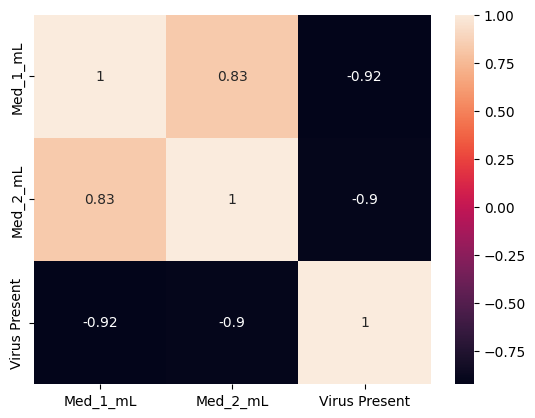

In [9]:
sns.heatmap(df.corr(),annot = True)

In [10]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

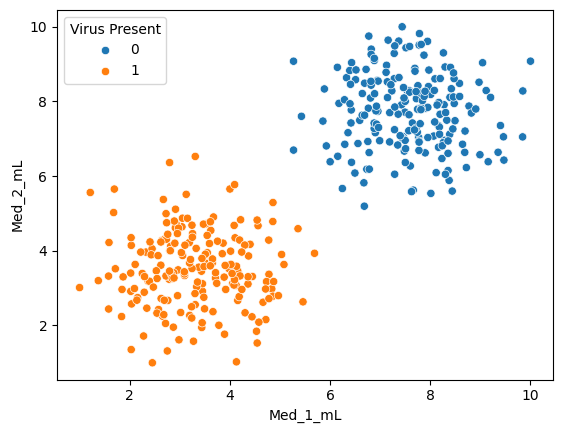

In [11]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue = 'Virus Present',data = df)
plt.show()

In [13]:
#Train Test Split
X = df.drop('Virus Present', axis =1)
y = df['Virus Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [14]:
#Applying Logistic Regression First 

log_default = LogisticRegression()
log_default.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Predicting

pred_train = log_default.predict(X_train)
pred_test = log_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(log_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


<h2> With 100% accuracy we can predict the Outcome for the given i/p features with logistic Regression</h2>

In [16]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [17]:
#Applying K-NN 
#Modeling
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
pred_train = knn_default.predict(X_train)
pred_test = knn_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(knn_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


In [19]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,10))}
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 1}

In [20]:
#Applying K-NN with hyper parameter 
#Modeling
from sklearn.neighbors import KNeighborsClassifier
knn_hp = KNeighborsClassifier(n_neighbors=1)
knn_hp.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred_train = knn_hp.predict(X_train)
pred_test = knn_hp.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(knn_hp,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


In [22]:
knn_hp.predict([[1.580321,2.440562]])

array([1])

In [23]:
#Applying K-NN with hyper parameter  and scaler
#Modeling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # For training we need to tranform the data and fit into the model.
X_test = scaler.transform(X_test) # For testing we need to tranform the data and give to the model. 


from sklearn.neighbors import KNeighborsClassifier
knn_hp_sc = KNeighborsClassifier(n_neighbors=1)
knn_hp_sc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred_train = knn_hp_sc.predict(X_train)
pred_test = knn_hp_sc.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(knn_hp_sc,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


In [25]:
knn_hp.predict([[6.508231,8.582531]])
knn_hp_sc.predict([[4.9,3.9]])

array([0])

<h2>With 100% accuracy we can predict the Outcome for the given i/p features with K-NN (K=19)</h2>

<h2> As the i/p col values are small even after applyinmg scaler the accuracy does not change </h2> 

In [26]:
from sklearn.svm import SVC
svm_default = SVC()
svm_default.fit(X_train, y_train)

SVC()

In [27]:
pred_train = svm_default.predict(X_train)
pred_test = svm_default.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(svm_default,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


<h2> Hyperparameter Tuning </h2>

In [28]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid = GridSearchCV(estimator,param_grid,cv=5)
#grid.fit(X,y)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [29]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [30]:
from sklearn.svm import SVC
svm_hp = SVC(kernel = 'linear',C = 0.01)
svm_hp.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [31]:
pred_train = svm_hp.predict(X_train)
pred_test = svm_hp.predict(X_test)

train_accuracy  = accuracy_score(y_train, pred_train)
test_accuracy  = accuracy_score(y_test, pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


scores = cross_val_score(svm_hp,X,y,cv=5,scoring="accuracy")
print(scores)
print('Cross Validation :', scores.mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
[1. 1. 1. 1. 1.]
Cross Validation : 1.0


In [32]:
confusion_matrix(y_test,pred_test)

array([[38,  0],
       [ 0, 42]])

In [33]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [34]:
roc_auc_score(y_test,pred_test)

np.float64(1.0)

In [35]:
roc_auc_score(pred_test,y_test)

np.float64(1.0)